# Solving a Cubic - by hand

Solving a cubic polynomial equation can be done by hand. But the computations are a bit tedious. The process is long enough that it is common to have an error of simple arithmetic pop up. Since a computer is good at avoiding those, let's use this worksheet to make the process cleaner.

## Our Challenge:

We wish to find the roots of the cubic polynomial
\[
P(x) = x^3 + 5x^2 - 14x + 26,
\]
that is, we want to find the solutions of the equation
\[
x^3 + 5x^2 - 14x + 26 = 0.
\]


In [1]:
P(x) = x^3 + 5*x^2 - 14*x + 26
P(x)

x^3 + 5*x^2 - 14*x + 26

### Step One: get into the reduced form $x^3 + px + q = 0$

Our polynomial is already has a leading coefficient of $1$, so we are left to find a substitution that removes the quadratic term. This should work:
\[
x = z - 5/3
\]

In [2]:
z = var('z')
Q(z) = P(x).subs(x=z-5/3); Q(z)

1/27*(3*z - 5)^3 + 5/9*(3*z - 5)^2 - 14*z + 148/3

In [3]:
Q(z).expand()

z^3 - 67/3*z + 1582/27

We see that $p=-67/3$ and $q=1582/27$

In [4]:
q = Q(0)
p = diff(Q,z)(0)
p, q

(-67/3, 1582/27)

### Step Two: Compare with the "ideal form"

If we were lucky, we could compare our polynomial with the cube-of-a-sum polynomial and _see the answer_ magically. Let's get our comparison object down, at least. Of course, it requires the insight to use this clever rearrangment:
\[
(u+v)^3 = 3uv (u+v) + (u^3+v^3).
\]
If we move stuff around, we want to compare
\[
(u+v)^3 - 3uv (u+v) - (u^3+v^3) = 0
\]
with
\[
z^3 - \frac{67}{3}z + \frac{1582}{27} = 0.
\]
Let's guess that $z= u+v$, and so, by pattern matching, we want
\[
-3uv = p = -67/3 \quad \text{and} \quad -(u^3+v^3) = q = 1582/27.
\]

So we deduce that $u$ and $v$ should satisfy these equations:
\[
uv = -p/3 = 67/9
\]
and
\[
-(u^3 + v^3) = q = 1582/27 .
\]


### Step Three: Solve for $u^3$ and $v^3$

It is a challenge to solve for $u$ and $v$ directly. Instead, let us try to solve for $s = u^3$ and $t=v^3$. Note that we know
$s+t$ and $s\cdot t$. This means we can rely on our knowlege of quadratic equations! As a refresher:



In [5]:
s,t = var('s t')
((x-s)*(x-t)).expand()


s*t - s*x - t*x + x^2

so we can recover $s$ and $t$ from their sum and product by using the quadratic formula. That is niiiiiiiice.

I'm gonna use a little wizardry to get things arranged but keep from retyping numbers. We want to find the roots of

\[
y^2 + by + c  = y^2 -(s+t)y + (st)
= y^2 -(u^3+v^3)y + (u^3v^3) = y^2 +q y + (-p/3)^3
\]

so, we set up as follows:

In [6]:
y = var('y')
b = q
c = (-p/3)^3
show(y^2 + b*y + c)

y^2 + 1582/27*y + 300763/729

Finally, we can use the quadratic equation.

In [7]:
u3 = ( - b + (b^2-4*c).sqrt())/2  # note that a = 1
v3 = ( - b - (b^2-4*c).sqrt())/2

### Here is the big reveal, what do we find for $u^3$ and $v^3$?

In [8]:
show(u3)
show(v3)

1/3*sqrt(12034/3) - 791/27

-1/3*sqrt(12034/3) - 791/27

Alright! those are at least numbers. So far, so good. Let's ask for approximations of those numbers to get a sense of what we have.

In [9]:
u3.n(digits=10)

-8.184600398

In [10]:
v3.n(digits=10)

-50.40799219

Now we just need to find the cube roots of these to get $u$ and $v$


### Find $u$ and $v$ by extracting cube roots

This is a little tricky sometimes. Here SageMath will introduce complex numbers if I do $\sqrt[3]{-\text{something}}$, so we do a little hack to keep it happy.

In [11]:
r = -pow(-u3,1/3)
r.n(digits=10)

-2.015266536

In [12]:
R = -pow(-v3,1/3)
R.n(digits=10)

-3.694024741

In [13]:
soln = r+R
soln.n()

-5.70929127702354

Okay. That is my best guess at an answer. This number $\mathrm{soln}$ is a root of our cubic in $z$. We'll have to adjust to get $x = z - 5/3$.

In [14]:
final = soln - 5/3
final.n()

-7.37595794369021

In [15]:
show(final)

-1/3*(9*sqrt(12034/3) + 791)^(1/3) - (-1/3*sqrt(12034/3) + 791/27)^(1/3) - 5/3

## Let's check

We can check the quality of our answer in two ways
  
  * we can evaluate our polynomial at this value `final` and see if we get zero, or
  * We can graph the original cubic between $x=-8$ and $x=-7$ and look for a root.

In [16]:
i_hope_this_is_zero = P(x).subs(x=final)
show(i_hope_this_is_zero.simplify_full().canonicalize_radical())

-1/9*(-1)^(1/3)*(3*sqrt(547)*sqrt(11)*sqrt(3)*sqrt(2) + 791)^(2/3)*(3*sqrt(547)*sqrt(11)*sqrt(3)*sqrt(2) - 791)^(1/3) - 1/9*(3*sqrt(547)*sqrt(11)*sqrt(3)*sqrt(2) + 791)^(1/3)*((-1)^(2/3)*(3*sqrt(547)*sqrt(11)*sqrt(3)*sqrt(2) - 791)^(2/3) - 67) + 67/9*(-1)^(1/3)*(3*sqrt(547)*sqrt(11)*sqrt(3)*sqrt(2) - 791)^(1/3)

**yeesh!** That is intimidating. How can we sort out if that is zero or not?
Well, let's at least makes sure we are evaluating at the value we care about

In [17]:
i_hope_this_is_zero.n(digits=10)

8.847564459e-9

At least that is a really small number. We'll have to trust our graph, I suppose.

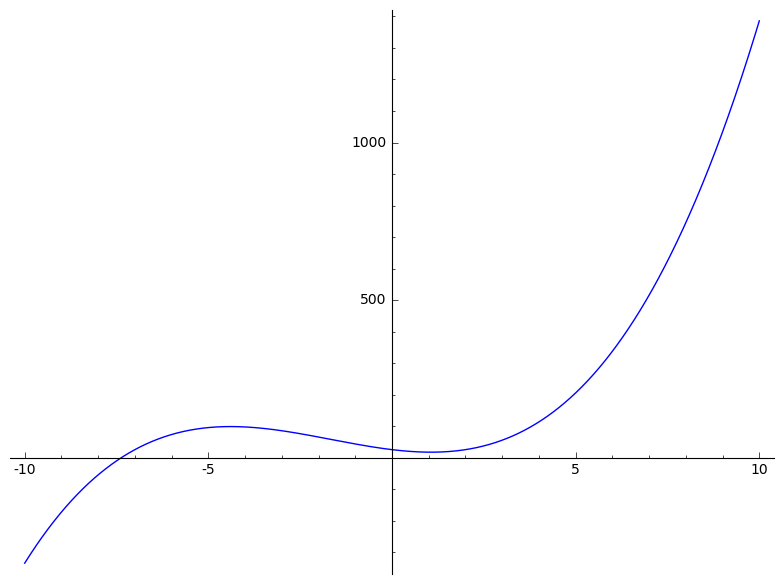

In [18]:
plot(P(x),(x,-10,10))